In [1]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), '..')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/home/josalhor/Desktop/clothes-extractor


In [2]:
from src.dataset import ClothesDataLoader, ClothesDataset
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/josalhor/Desktop/clothes-extractor


In [4]:
@dataclass
class OptClass:
    dataset_dir: str = "./datasets/zalando-hd-resized"
    dataset_mode: str = "train"
    dataset_list: str = "train_pairs.txt"
    batch_size: int = 64
    workers: int = 1
    load_height: int = 1024
    load_width: int = 768

opts = OptClass()

clothes_dataset = ClothesDataset(opt=opts)
clothes_loader = ClothesDataLoader(opt=opts, dataset=clothes_dataset)


In [5]:
result = clothes_dataset[2]
print('Imaname: ', result["img_name"])
print('Img shape: ', result["img"].shape)
print('Cloth shape: ', result["cloth"].shape)
print('Cloth Mask: ', result["cloth_mask"].shape)
print('Agnostic Mask: ', result["agnostic_mask"].shape)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
# iter_ = iter(clothes_loader)
# bimg, blabel = next(iter_)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images \
# ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width \
# pixels)')
# print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

Imaname:  08020_00.jpg
Img shape:  torch.Size([3, 1024, 768])
Cloth shape:  torch.Size([3, 1024, 768])
Cloth Mask:  torch.Size([3, 1024, 768])
Agnostic Mask:  torch.Size([3, 1024, 768])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


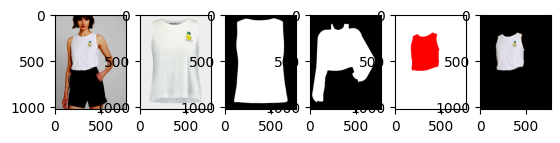

In [6]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
ax1.imshow(result["img"].permute(1,2,0))
ax2.imshow(result["cloth"].permute(1,2,0))
ax3.imshow(result["cloth_mask"].permute(1,2,0))
ax4.imshow(result["agnostic_mask"].permute(1,2,0))
ax5.imshow(result["mask_body"].permute(1,2,0))
ax6.imshow(result["img_masked"].permute(1,2,0))
